In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [46]:
df = pd.read_excel(r"D:\excelr assignments\forecasting\Airlines+Data.xlsx")

In [47]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [48]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

In [49]:
df.shape

(96, 2)

In [50]:
df.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [51]:
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [52]:
df['Year'] = pd.DatetimeIndex(df['Month']).year

In [53]:
df['month'] = pd.DatetimeIndex(df['Month']).month

In [54]:
df.head()

,Month,Passengers,Year,month
0,1995-01-01,112,1995,1
1,1995-02-01,118,1995,2
2,1995-03-01,132,1995,3
3,1995-04-01,129,1995,4
4,1995-05-01,121,1995,5


<AxesSubplot:>

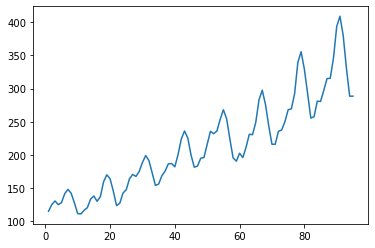

In [55]:
df['Passengers'].rolling(2).mean().plot()

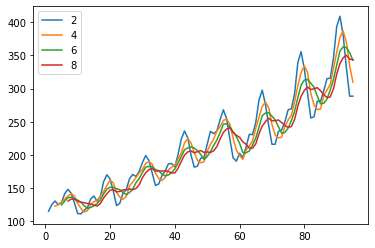

In [56]:
for i in range(2,10,2):
    df['Passengers'].rolling(i).mean().plot(label=str(i))
plt.legend()   

<AxesSubplot:xlabel='month', ylabel='Year'>

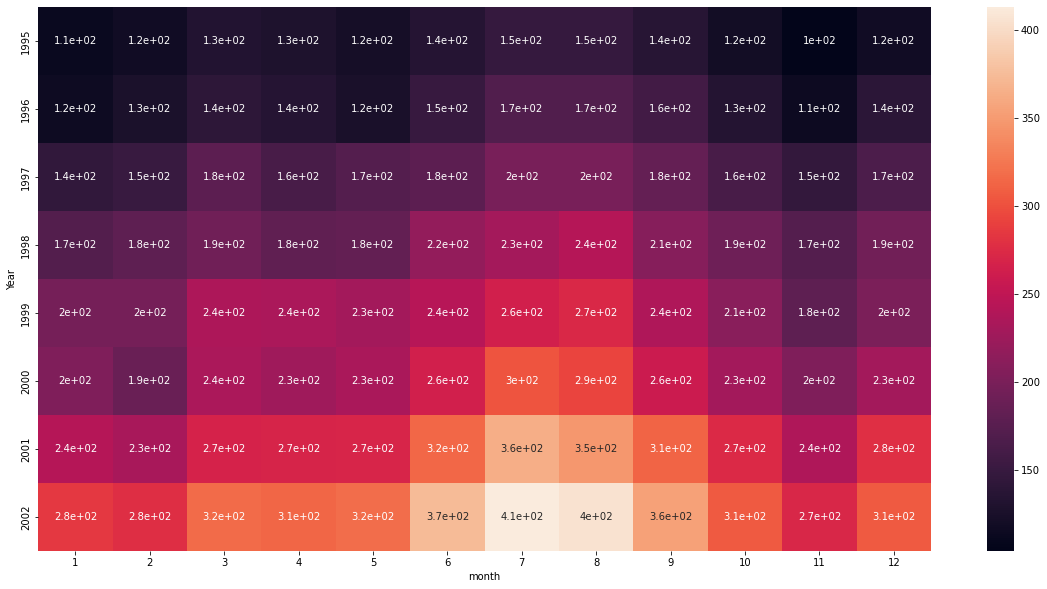

In [57]:
plt.figure(figsize=(20,10))
heatmap = pd.pivot_table(data=df,aggfunc='mean',fill_value=0,values='Passengers',index='Year',columns='month')
sns.heatmap(heatmap,annot=True)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

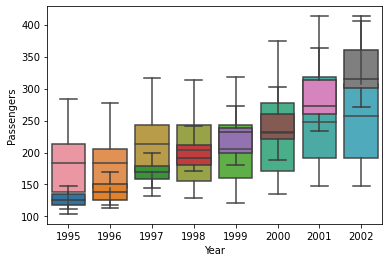

In [58]:
sns.boxplot(x="month",y="Passengers",data=df)
sns.boxplot(x="Year",y="Passengers",data=df)

<AxesSubplot:xlabel='Year', ylabel='Passengers'>

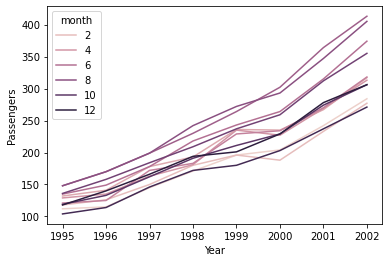

In [59]:
sns.lineplot(x="Year",y="Passengers",hue="month",data=df)


In [60]:
df.set_index('Month',inplace=True)

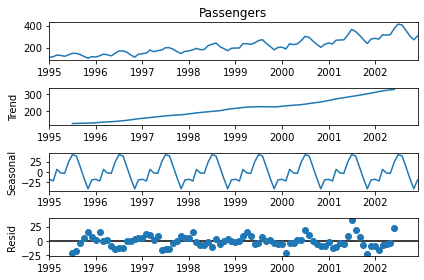

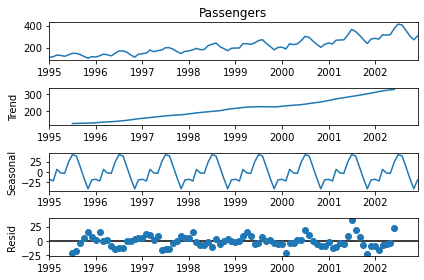

In [61]:
ts_add = seasonal_decompose(x=df['Passengers'])
ts_add.plot()

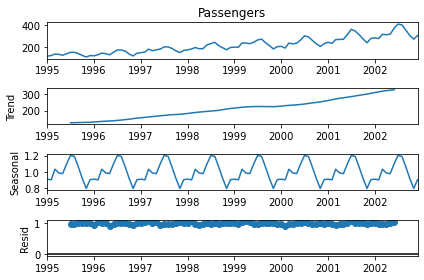

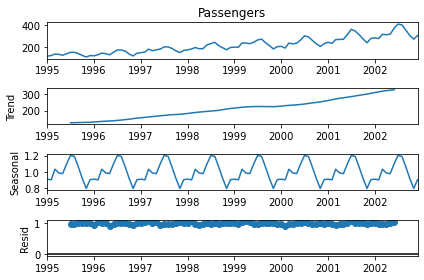

In [62]:
ts_mult = seasonal_decompose(x=df['Passengers'],model="multiplicative")
ts_mult.plot()

In [63]:
df.tail()

,Passengers,Year,month
Month,,,
2002-08-01,405,2002,8
2002-09-01,355,2002,9
2002-10-01,306,2002,10
2002-11-01,271,2002,11
2002-12-01,306,2002,12


C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


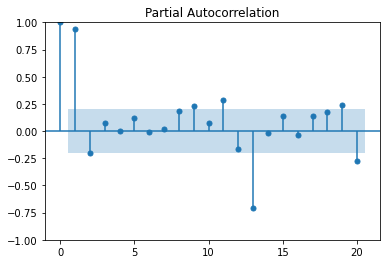

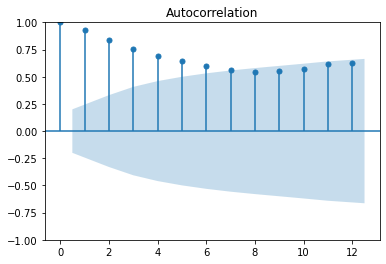

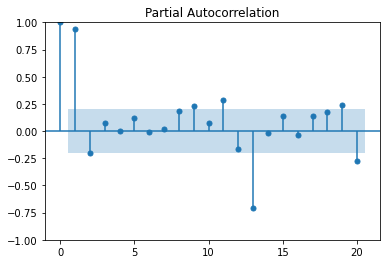

In [64]:
tsa_plots.plot_acf(df.Passengers,lags=12)
tsa_plots.plot_pacf(df.Passengers)

In [65]:
df.head()

,Passengers,Year,month
Month,,,
1995-01-01,112,1995,1
1995-02-01,118,1995,2
1995-03-01,132,1995,3
1995-04-01,129,1995,4
1995-05-01,121,1995,5


In [66]:
import calendar

In [67]:
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])

In [69]:
month_dummies = pd.get_dummies(df['month'])
df = pd.concat([df,month_dummies],axis=1)

In [70]:
df.shape

(96, 15)

In [72]:
df['t'] = np.arange(1,97)

In [73]:
df['t_squared'] = df['t']*df['t']

In [74]:
df['log_passengers'] = np.log(df['Passengers'])

In [77]:
Train = df.head(84)
Test = df.tail(12)

In [ ]:
# L I N E A R #

In [79]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

53.19923653480271

In [ ]:
# Exponential #

In [80]:
exp = smf.ols('log_passengers~t',data=Train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

46.05736110315635

In [81]:
# Quadratic #

In [82]:
quad = smf.ols('Passengers~t+t_squared',data=Train).fit()
pred_quad = pd.Series(quad.predict(Test[["t","t_squared"]]))
rmse_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_quad))**2))
rmse_quad

48.05188897933164

In [83]:
# Additive seasonality #

In [88]:
add_s = smf.ols('Passengers~January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_s = pd.Series(add_s.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December']]))
rmse_add_s = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_s))**2))
rmse_add_s

132.81978481421814

In [ ]:
# Additive Seasonality Quadratic #

In [89]:
add_sea_q = smf.ols('Passengers~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data=Train).fit()
pred_add_sea_q = pd.Series(add_sea_q.predict(Test[['January','February','March','April','May','June','July','August','September','October','November','December','t','t_squared']]))
rmse_add_sea_q = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_q))**2))
rmse_add_sea_q 

26.360817612096113

In [ ]:
# Multiplicative Seasonality #

In [90]:
mul_sea = smf.ols('log_passengers~January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_mult_sea = pd.Series(mul_sea.predict(Test))
rmse_mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_sea)))**2))
rmse_mult_sea

140.06320204708652

In [ ]:
#Multiplicative Additive Seasonality #

In [92]:
mul_add_sea = smf.ols('log_passengers~t+January+February+March+April+May+June+July+August+September+October+November+December',data = Train).fit()
pred_mult_add_sea = pd.Series(mul_add_sea.predict(Test))
rmse_mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_mult_add_sea)))**2))
rmse_mult_add_sea 


10.519172544324281

In [ ]:
# Testing #

In [93]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_exp","rmse_quad","rmse_add_s","rmse_add_sea_q","rmse_mult_sea","rmse_mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_exp,rmse_quad,rmse_add_s,rmse_add_sea_q,rmse_mult_sea,rmse_mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,53.199237
1,rmse_exp,46.057361
2,rmse_quad,48.051889
3,rmse_add_s,132.819785
4,rmse_add_sea_q,26.360818
5,rmse_mult_sea,140.063202
6,rmse_mult_add_sea,10.519173


In [112]:
model_full = smf.ols('Passengers~t+t_squared+January+February+March+April+May+June+July+August+September+October+November+December',data=df).fit()

pred_new  = pd.Series(model_full.predict(df))
pred_new

df["forecasted_Passengers"] = pd.Series(pred_new)

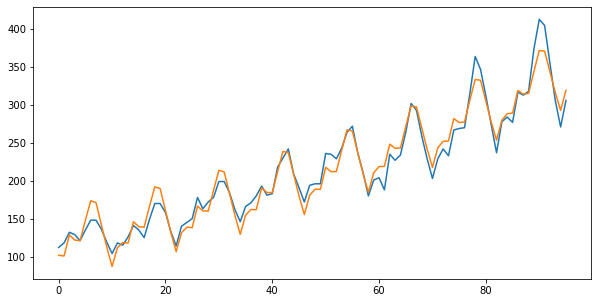

In [117]:
plt.figure(figsize=(10,5))
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))

In [94]:
#Multiplicative Additive Seasonality has the least rmse value

In [118]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [119]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 
from statsmodels.tsa.holtwinters import Holt 
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [124]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Passengers"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Passengers)


C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


13.411274740513823

In [125]:
# Holt method 
hw_model = Holt(Train["Passengers"]).fit(smoothing_trend=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Passengers) 

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


15.923223943416039

In [126]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Passengers) 


C:\Users\lokit\AppData\Local\Temp\ipykernel_23660\3283432776.py:2: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  hwe_model_add_add = ExponentialSmoothing(Train["Passengers"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


6.347725413137533

In [127]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Passengers) 

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


2.821093186644687

In [ ]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend gives least value

In [ ]:
#Final model

In [128]:
hwe_model_mul_add = ExponentialSmoothing(df["Passengers"],seasonal="mul",trend="add",seasonal_periods=12).fit()

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [130]:
hwe_model_mul_add.forecast(12)

2003-01-01    312.899424
2003-02-01    308.171306
2003-03-01    355.532782
2003-04-01    345.769814
2003-05-01    345.696096
2003-06-01    392.470733
2003-07-01    436.501361
2003-08-01    429.859243
2003-09-01    380.172872
2003-10-01    332.317301
2003-11-01    290.625519
2003-12-01    330.590176
Freq: MS, dtype: float64

In [137]:
from pmdarima import auto_arima

In [138]:
auto_arima_model = auto_arima(Train["Passengers"],start_p=0,
                              start_q=0,max_p=10,max_q=10,
                              m=12,start_P=0,seasonal=True,
                              d=1,D=1,trace=True,error_action="ignore",
                              suppress_warnings= True,
                              stepwise=False)

 ARIMA(0,1,0)(0,1,0)[12]             : AIC=536.198, Time=0.17 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=533.081, Time=0.06 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=534.832, Time=0.10 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=533.128, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=534.950, Time=0.08 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=534.789, Time=0.08 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(0,1,0)(2,1,2)[12]             : AIC=inf, Time=0.68 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=533.591, Time=0.03 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=531.484, Time=0.07 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=532.519, Time=0.16 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=531.004, Time=0.06 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=533.002, Time=0.09 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=inf, Time=0.62 sec
 ARIMA(0,1,1)(2,1,0)[12]  

In [139]:
auto_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   84
Model:             SARIMAX(0, 1, 3)x(1, 1, [], 12)   Log Likelihood                -260.238
Date:                             Fri, 09 Jun 2023   AIC                            530.476
Time:                                     19:01:01   BIC                            541.789
Sample:                                 01-01-1995   HQIC                           534.975
                                      - 12-01-2001                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2709      0.124     -2.186      0.029      -0.514      -0.028
ma.L2          0.0498      0.145      0.343      0.732      -0.235       0.334
ma.L3         -0.2590      0.145     -1.785      0.074      -0.543       0.025
ar.S.L12      -0.2329      0.122     -1.913      0.056      -0.472       0.006
sigma2        88.1575     15.740      5.601      0.000      57.308     119.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.37
Prob(Q):                              0.96   Prob(JB):                         0.51
Heteroskedasticity (H):               2.57   Skew:                             0.33
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [147]:
prediction = pd.Series(auto_arima_model.predict(n_periods = 12),index=Test.index)

In [148]:
prediction.index = Test.index

In [149]:
MAPE(prediction,Test.Passengers)

2.366470422942923

In [ ]:
#By using Auto ARIMA Model we get values for ARIMA as (0,1,3)(1,1,0) [12].

In [150]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [151]:
model_SARIMA=SARIMAX(Train['Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [152]:
model_SARIMA_fit=model_SARIMA.fit()

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [153]:
model_SARIMA_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                          Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Fri, 09 Jun 2023   AIC                            548.481
Time:                                     19:08:48   BIC                            568.971
Sample:                                 01-01-1995   HQIC                           556.638
                                      - 12-01-2001                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5991      0.938      0.639      0.523      -1.239       2.437
ar.L2          0.8312      0.232      3.579      0.000       0.376       1.286
ar.L3         -0.4533      0.894     -0.507      0.612      -2.205       1.299
ma.L1          0.1830      1.165      0.157      0.875      -2.101       2.466
ma.L2         -0.5349      1.263     -0.423      0.672      -3.011       1.941
ma.L3         -0.0985      0.384     -0.256      0.798      -0.852       0.655
ma.L4         -0.1271      0.338     -0.377      0.706      -0.789       0.534
ma.L5          0.2472      0.357      0.693      0.488      -0.452       0.947
sigma2        87.7264     81.195      1.080      0.280     -71.414     246.866
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [168]:
pred_Sarima=model_SARIMA_fit.predict(start='2002-01-01',end='2002-12-01')
residuals=Test['Passengers']-pred_Sarima

<AxesSubplot:xlabel='Month'>

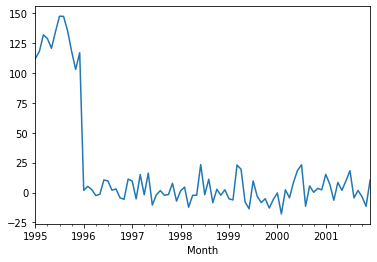

In [169]:
model_SARIMA_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

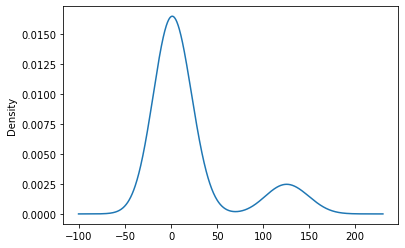

In [170]:
model_SARIMA_fit.resid.plot(kind='kde')

In [171]:
Test['Predicted_SARIMA']=pred_Sarima

C:\Users\lokit\AppData\Local\Temp\ipykernel_23660\212026348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Test['Predicted_SARIMA']=pred_Sarima


<AxesSubplot:xlabel='Month'>

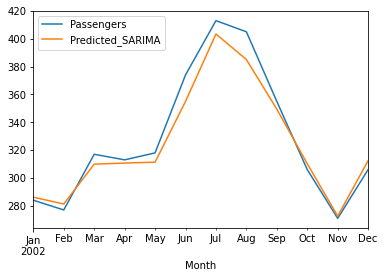

In [172]:
Test[['Passengers','Predicted_SARIMA']].plot()